In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

In [2]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# compute n of labels
num_labels = len(np.unique(y_train))

In [4]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

In [5]:
# resize
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size])
x_test  = np.reshape(x_test,  [-1, image_size, image_size])

# normalize
x_train = x_train.astype('float32') / 255
x_test  = x_test.astype('float32')  / 255

In [6]:
# network params
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256)               72960     
                                                                 
 dense (Dense)               (None, 10)                2570      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


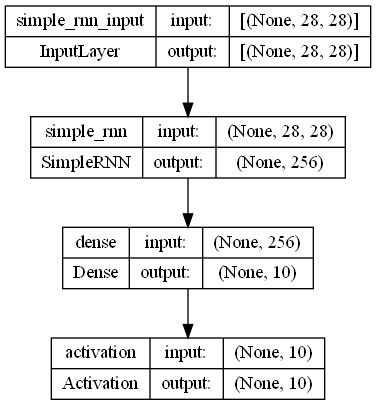

In [7]:
# model is RNN with 256 units, input is 28-dim vector 28 timesteps
model = Sequential()
model.add(SimpleRNN(units=units, 
                    dropout=dropout, 
                    input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='rnn-mnist.png', show_shapes=True)

In [8]:
# loss function for one-hot vector
# sgd optimizer
# accuracy metric

model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

_, acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)

print("\nTest accuracy: %.1f%%" % (100 * acc))

Epoch 1/20
469/469 [==============================] - 8s 15ms/step - loss: 0.7323 - accuracy: 0.7889
Epoch 2/20
469/469 [==============================] - 7s 16ms/step - loss: 0.3308 - accuracy: 0.9025
Epoch 3/20
469/469 [==============================] - 8s 17ms/step - loss: 0.2485 - accuracy: 0.9264
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.2061 - accuracy: 0.9392
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1741 - accuracy: 0.9494
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1571 - accuracy: 0.9534
Epoch 7/20
469/469 [==============================] - 7s 16ms/step - loss: 0.1418 - accuracy: 0.9581
Epoch 8/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1319 - accuracy: 0.9607
Epoch 9/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1222 - accuracy: 0.9638
Epoch 10/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1136 - accura